## Sleep Health and Lifestyle Dataset - Exploratory Data Analysis Project

###### Author: Leda Gale

### Dataset General Information

Title: Sleep Health and Lifestyle

Source: Figshare

Version: 2

Date: 13/12/2023

License: (https://creativecommons.org/licenses/by/4.0/)

### Importing the dataset

In [37]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
#Importing the dataset
df = pd.read_csv("Sleep_health.csv")

#General review of the features included on the dataset
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


### Identifying dataset shape and attribute

In [4]:
#Identifying the dataset shape
df.shape

(186, 13)

The methods .head() and shape have been useful to explore which attributes are included in the dataset. A total of 13 attributes were identified with 186 entries or subjects of study. 

The attributes as indicated in the source are the following ones:
1. Person ID: Identifier for each individual
2. Gender: The gender of each person (Male/Female)
3. Age: The age of the person in years
4. Occupation: The occupation or profession of the person
5. Sleep Duration (hours): The number of hours the person sleeps per day
6. Quality of Sleep (scale 1-10): A subjective rating of the quality of sleep
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily
8. Stress Level (scale 1-10): A subjective rating of the stress level experienced by the person
9. BMI Category: The BMI category of the person (Underweight, Normal, Overweight)
10. Blood Pressure(systolic/diastolic): The blood pressure measurement of the person is indicated as systolic pressure over diastolic pressure.
11. Daily steps: The number of steps the person takes per day.
12. Heart rate (bpm): The resting heart rate of the person in beats per minute
13. Sleep Disorder: The presence of a sleep disorder in the person (None, Insomnia, Sleep Apnea)

### Checking on the data types and null values on the datafame

In [5]:
#Searching for more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    object 
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    int64  
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    object 
 9   Blood Pressure           186 non-null    object 
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
 12  Sleep Disorder           30 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


In [6]:
#Null values revision
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             156
dtype: int64

#### Observations:

After using the method .info() and .isna() it can be seen the attribute sleep disorder shows as if it has 156 null values, however, after the glimpse on the dataset done before, it has been identified these are actually values with the label of "Nan" which means in this case the person does not suffer of any sleeping disorder. 
To deal with these values, the "Nan" label will be replaced by "Nothing," which is not classified as a missing value and can be used for further analysis.

In [7]:
df.fillna({"Sleep Disorder": "Nothing"},inplace = True)

In [8]:
#Null values revision
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Checking for duplicates

### Renaming variables for better understanding

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.rename(columns = {"Sleep Duration": "Sleep_duration", "Quality of Sleep": "Sleeping_quality", "Physical Activity Level": "Activity_level", "Stress Level": "Stress_level", "BMI Category": "BMI", "Blood Pressure": "Blood_pressure", "Heart Rate": "Heart_rate", "Daily Steps": "Daily_steps", "Sleep Disorder": "Sleep_disorder"})

### Dropping unnecessary columns

In [11]:
df.drop(columns = ["Person ID"], inplace = True)
df

,Gender,Age,Occupation,Sleep_duration,Sleeping_quality,Activity_level,Stress_level,BMI,Blood_pressure,Heart_rate,Daily_steps,Sleep_disorder
0,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Nothing
2,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Nothing
3,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,Nothing
4,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,Nothing
...,...,...,...,...,...,...,...,...,...,...,...,...
181,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
182,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
183,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
184,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


### Getting further information on relevant attributes

In [12]:
print(f'Gender: {df["Gender"].unique()}')
print(f'Gender: {df["Gender"].nunique()}')

Gender: ['Female' 'Male']
Gender: 2


In [13]:
print(f'Age: {df["Age"].unique()}')
print(f'Age: {df["Age"].nunique()}')

Age: [59 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Age: 16


In [14]:
print(f'Occupation: {df["Occupation"].unique()}')
print(f'Occupation: {df["Occupation"].nunique()}')

Occupation: ['Nurse' 'Doctor' 'Engineer' 'Accountant' 'Scientist' 'Teacher'
 'Software Engineer' 'Lawyer' 'Salesperson']
Occupation: 9


In [15]:
print(f'BMI: {df["BMI"].unique()}')
print(f'BMI: {df["BMI"].nunique()}')

BMI: ['Overweight' 'Normal' 'Normal Weight' 'Obese']
BMI: 4


In [16]:
print(f'Sleep_disorder: {df["Sleep_disorder"].unique()}')
print(f'Sleep_disorder: {df["Sleep_disorder"].nunique()}')

Sleep_disorder: ['Sleep Apnea' 'Nothing' 'Insomnia']
Sleep_disorder: 3


#### Observation:

It has been identified that the range of ages included in the study spans from 29 to 59. The occupations of the users are varied and represented by different areas, including professionals from medicine, engineering, finance, science, education, justice, and sales. Regarding the BMI attribute, there are users with Normal, Obese, and Overweight. And about sleeping disorders, a small number of users suffered either insomnia or sleep apnea.
Applying the method .unique() it has been noticed that for the attribute BMI two categories "Normal" and "Normal Weight" are the same; however, due to the slight difference in the name, the method recognizes them as two different categories. To fix this, the labels "Normal weight" will be transform into "Normal"

In [21]:
df.replace(to_replace = "Normal Weight", value = "Normal", inplace = True)


In [22]:
print(f'BMI: {df["BMI"].unique()}')
print(f'BMI: {df["BMI"].nunique()}')

BMI: ['Overweight' 'Normal' 'Obese']
BMI: 3


### Descriptive statistics

In [23]:
df.describe()

,Age,Sleep_duration,Sleeping_quality,Activity_level,Stress_level,Heart_rate,Daily_steps
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,35.672043,7.083333,7.198925,58.016129,5.607527,70.204301,6829.569892
std,4.436333,0.623323,0.996317,18.096580,1.452583,3.293102,1331.179858
min,29.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3300.000000
25%,32.000000,6.600000,6.000000,45.000000,4.000000,68.000000,5500.000000
50%,36.000000,7.200000,8.000000,60.000000,5.000000,70.000000,7000.000000
75%,39.000000,7.600000,8.000000,75.000000,6.750000,72.000000,8000.000000
max,59.000000,8.100000,9.000000,90.000000,8.000000,84.000000,8000.000000


#### Observations

The descriptive method provides the following details:
- Count: Number of entries
- Mean: Average value
- Std: Standard deviation (how spread out the values are)
- Min: Minimum value
- 25%: Q1 25 % of the data follows in this category
- 50%: Q2 Middle value of median
- 75%: Q3 75 % of the data follows in this category
- Max: Maximum value

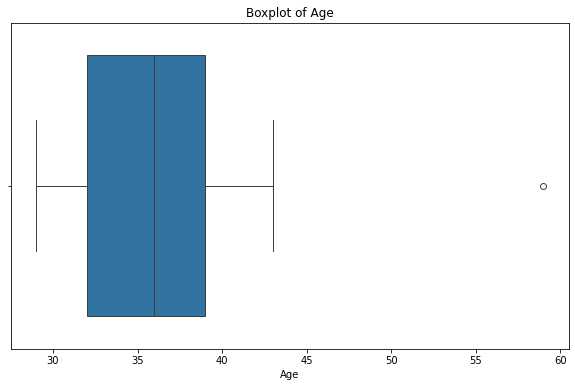

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df["Age"], orient = "h")
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

In [43]:
q1 = np.quantile(df["Age"],0.25)
print(f'Q1: {q1}')
q2 = np.quantile(df["Age"],0.5)
print(f'Q2: {q2}')
q3 = np.quantile(df["Age"],0.75)
print(f'Q3: {q3}')

#from scipy.stats import iqr
iqr = q3-q1
print(f'IQR: {iqr}')

Q1: 32.0
Q2: 36.0
Q3: 39.0
IQR: 7.0


In [44]:
outliers = (df[~((df["Age"]<(q1-(1.5*iqr))) | (df["Age"]<(q3+(1.5*iqr)))) ] )
outliers

,Gender,Age,Occupation,Sleep_duration,Sleeping_quality,Activity_level,Stress_level,BMI,Blood_pressure,Heart_rate,Daily_steps,Sleep_disorder,Heart_rate_transformed
0,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,4.234107


In [46]:
df = (df[((df["Age"]<(q1-(1.5*iqr))) | (df["Age"]<(q3+(1.5*iqr)))) ] )


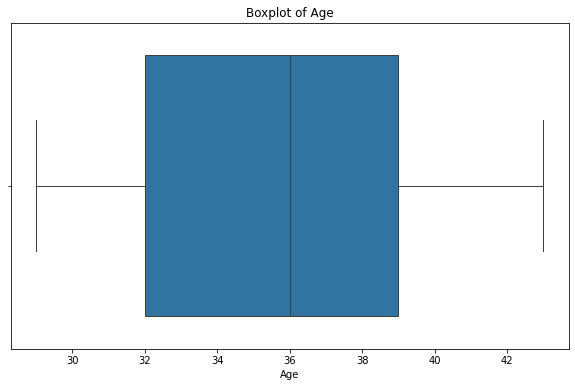

In [47]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df["Age"], orient = "h")
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

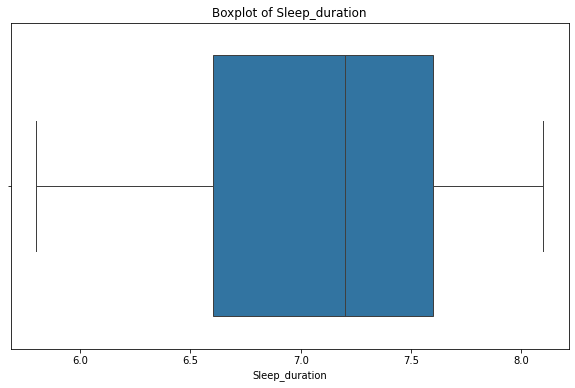

In [28]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df["Sleep_duration"], orient = "h")
plt.title("Boxplot of Sleep_duration")
plt.xlabel("Sleep_duration")
plt.show()

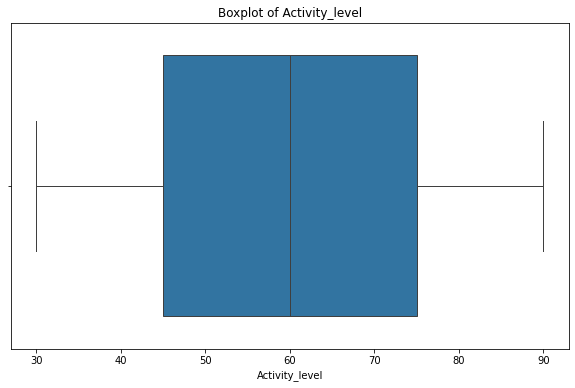

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df["Activity_level"], orient = "h")
plt.title("Boxplot of Activity_level")
plt.xlabel("Activity_level")
plt.show()

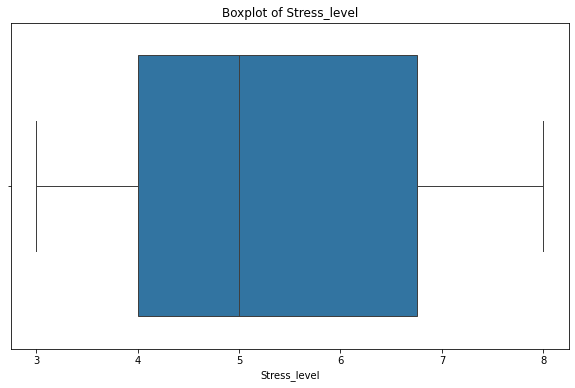

In [30]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df["Stress_level"], orient = "h")
plt.title("Boxplot of Stress_level")
plt.xlabel("Stress_level")
plt.show()

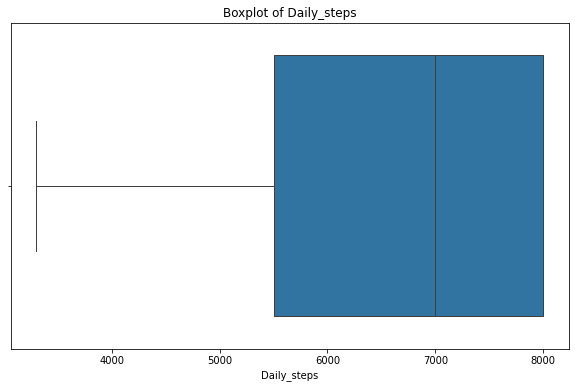

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df["Daily_steps"], orient = "h")
plt.title("Boxplot of Daily_steps")
plt.xlabel("Daily_steps")
plt.show()

#### Observations:

It has been noted that in some of the attributes, the data shows skewness, which has to be addressed when needed. It will be left as future evaluation.

### Visualization

Attributes Correlation

In [57]:
correlation = df.corr(numeric_only=True)
correlation

,Age,Sleep_duration,Sleeping_quality,Activity_level,Stress_level,Heart_rate,Daily_steps,Heart_rate_transformed
Age,1.000000,0.181006,0.461679,0.281492,-0.463409,-0.188815,0.097121,-0.196974
Sleep_duration,0.181006,1.000000,0.721659,0.934965,-0.673747,-0.414081,0.696775,-0.418535
Sleeping_quality,0.461679,0.721659,1.000000,0.672753,-0.865942,-0.724939,0.619329,-0.732396
Activity_level,0.281492,0.934965,0.672753,1.000000,-0.595229,-0.364038,0.693339,-0.365951
Stress_level,-0.463409,-0.673747,-0.865942,-0.595229,1.000000,0.583423,-0.422476,0.601108
Heart_rate,-0.188815,-0.414081,-0.724939,-0.364038,0.583423,1.000000,-0.571688,0.999243
Daily_steps,0.097121,0.696775,0.619329,0.693339,-0.422476,-0.571688,1.000000,-0.561915
Heart_rate_transformed,-0.196974,-0.418535,-0.732396,-0.365951,0.601108,0.999243,-0.561915,1.000000


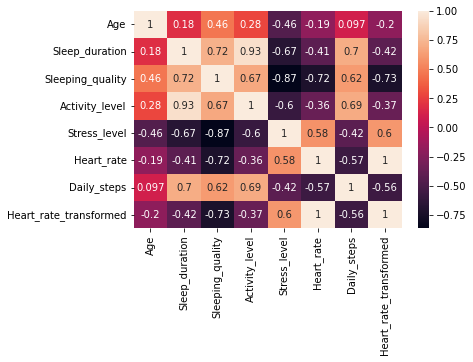

In [58]:
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True)

#### Conclusions

Positive correlations:
1. Sleep Duration and Activity Level (0.93): More active People tend to sleep longer.
2. Sleeping Quality and Activity Level (0.67): Better activity levels are associated with better sleep quality.
3. Sleep Duration and Sleeping Quality (0.72): Longer sleep generally means better sleep quality.

Negative correlations:
1. Stress Level and Sleeping Quality (-0.87): High stress is linked to poor sleep quality.
2. Stress Level and Activity Level (-0.6): More stress, lower activity.
3. Heart Rate and Sleeping Quality (-0.72): Higher heart rates tend to correspond with worse sleep quality.

Moderate correlations:
1. Daily Steps and Sleeping Quality (0.62): People who take more daily steps generally have better sleep quality.
2. Heart_rate_transformed ↔ Stress Level (0.6): transformed heart rate still reflects stress levels.
3. Age shows generally weak correlations with all variables, suggesting it’s not a strong determinant in this dataset for these lifestyle metrics.